# Weather Data - Data Cleaning and Preprocessing
## Data Science - CS 334
---------------------------------------------------------

### Dataset
- The weather dataset is a messy, real-world dataset containing an entire year’s worth of weather data from Boston, USA. 
- This dataframe has a lot of problems regarding the quality of the data. 
- The goal for this part of the assignment is to clean the data so it can be later used for insightful analysis.

### Importing Libraries
-----------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
#Loading data
df = pd.read_csv('weather_start.csv')
print(df.shape)
df.head()

(366, 23)


,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,...,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees,Date
0,'6','Rain','46','29','74','30.45','64','10','22','63',...,'13','40','26','52','30.01','39','10','0.01','268',Year: 2014 Month: 12 Day: 1
1,'7','Rain-Snow','40','29','92','30.71','42','10','24','72',...,'15','27','17','51','30.4','33','2','0.10','62',Year: 2014 Month: 12 Day: 2
2,'8','Rain','49','38','100','30.4','51','10','29','79',...,'12','42','24','57','29.87','37','1','0.44','254',Year: 2014 Month: 12 Day: 3
3,'3',NaN,'24','33','69','30.56','43','10','25','54',...,'12','21','13','39','30.09','30','10','0.00','292',Year: 2014 Month: 12 Day: 4
4,'5','Rain','37','26','85','30.68','42','10','22','66',...,'10','25','12','47','30.45','26','5','0.11','61',Year: 2014 Month: 12 Day: 5


<div style="color: pink; 
            background-color: #b73239;
            border-radius: 5px;
            padding: 5px 5px 5px 5px;
            display: inline-block">
    If you get a `SettingWithCopyWarning:` when using pandas, you can almost always ignore it. 
</div>

## Cleaning Part I: Data Formats and Types

--------------------------------------------------

- We can see the `Date` column has the information in a weird text-based style. So the first order of business is to parse the `Date` column and obtain separate year, month and day columns as integer values.You will use regex for this.Then you will combine these three columns using `pd.to_datetime` to create a datetime column which is a special type in pandas. It gives you some amazing funcitonality.
- Then you have individual weather related measurements (`Max.TemperatureF`, `Max.Dew.PointF` etc) but the values of these columns have quotes around them ('') so these need to be cleaned.
- For the weather related columns you need to fix the types. Pandas documentation is your friend so use it!
- You should also keep an eye out for inconsistent encodings.  Everything is a string, that means encoding issues can be present. These are more common in categorical variables like a column describing gender has both full words (female, male) and letters (f, m). You will need to properly standardise this issue.
- Everything is a string. This is a sign of a long day (maybe not?) of data cleaning ahead. Good Luck!

## 1) Combination of the Date Fields
- In this one, I extracted all three fields - Year, Month and Day from the Date field and made three separate fields. Then I combined them all using the pd_to_datetime function 

In [3]:
## Start of Part 1

# For Year, I extracted the first four integers first. 
df['Year'] = df['Date'].str.extract(r'([0-9][0-9][0-9][0-9])', expand=True)

# For Month, I just extracted it by indexing.
df['Month'] = df['Date'].str[17:20]

# For Day, I extracted it by getting the last digit.
df['Day'] = df['Date'].str.extract(r'(\d+$)', expand=True)

# Combined All three to create a datetime column.
df['Date'] = pd.to_datetime(df['Year']+'  '+ df['Month']+'  '+ df['Day'])

# After combining, I just dropped all the new Columns of Year, Month and Day that I made. The axis = 1 is used as we have to
# drop the Year, Month and Day Columns (Axis 1 works on Columns).
df.drop('Year', axis=1, inplace=True)
df.drop('Month', axis=1, inplace=True)
df.drop('Day', axis=1, inplace=True)

# df.head()

## 2) Removing Quotes

In [4]:
# Replaced all quotes(single '') with empty string.
df = df.replace({"'":""}, regex=True)

# df.head()

## 3) Changing Data Types to Float

In [5]:
# T actually refers to Trace Precipitation which basically indicates that precipitation has failed but precision is too 
# negligible for it to be tested. So we just replace it with 0. Reason : No Idea
df['PrecipitationIn'] = df['PrecipitationIn'].str.replace("T", "0.00") 

# I just changed the datatype for all columns columns to float64 with Events and Date being an exception. Because
# the weather_clean.pkl file displays float values.
excluded_cols = [i for i in df.columns if i not in ["Events","Date"]]
for index in excluded_cols:
    df[index] = df[index].astype(np.float64)
    
# df.head()

## 4) Replacing NAN Values
- Replaced NAN values in Events with None
- Replaced NAN values in the Weather Field with its median as this wouldn't cause it to become an outlier and have an effect on the dataset

In [6]:
# To cater for the NAN values in the Events Table, I replaced it with None as in the Table, there were no values present 
# for these cell of the Events Column provided and I did this because maybe nothing happened that day.
df['Events'].fillna(value='None', inplace=True)

# To cater for the NAN values in the Max Gust Table, I replaced it with the median of the column. 
df['Max.Gust.SpeedMPH'].fillna(value=df['Max.Gust.SpeedMPH'].median(), inplace=True)

# df.head()

## Distributions + Removing outliers + Imputing missing values

-----------------------------------------------------------------

- Now, you can start the process of data cleaning and exploration as these two things go hand-in-hand. Look for missing values and outliers. You can use different methods to find these problem points using visual methods like plots or analytical methods like summary statistics. 
- Look at what plots can be used to find outliers. Which columns have outliers? What are those values? What did you to process them?
- Which columns have missing values? Find all the columns of possible missing values and impute them using the correct method.
- Check for positive and negative values for all columns. Is there any value which is not allowed to be in a column? What can be done to correct these?

### Ways to Detect and Remove the Outliers?
#### Visualisation: Scatter Plot  | Box Plot

#### Statistics (IQR or Z-Score):
- You should use Z score method only if your data is normally distributed. 
- Since Data is not normally distributed here, we should use IQR.



## Using IQR and making a Box Plot To Check for Outliers wali Columns
- First I used the IQR to separate the outlier wali columns from the whole dataframe. Then I made a plot to look at the outliers

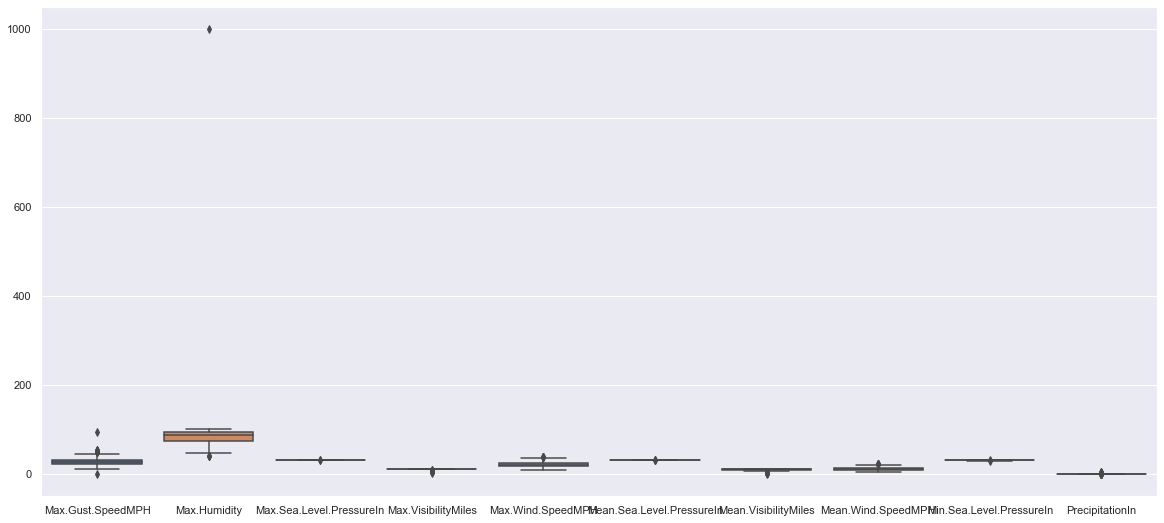

In [7]:
newdf = df.loc[: , 'Max.Dew.PointF':'WindDirDegrees']

quartile_1 = newdf.quantile(0.25)
quartile_3 = newdf.quantile(0.75)
IQR = quartile_3 - quartile_1

# Used for finding out which columns have outliers
outlierCount = ((newdf < (quartile_1 - 1.5 * IQR)) |(newdf > (quartile_3 + 1.5 * IQR))).sum()

# Combined those columns separately from the others
evenmoreNew = newdf[["Max.Gust.SpeedMPH","Max.Humidity","Max.Sea.Level.PressureIn","Max.VisibilityMiles" ,"Max.Wind.SpeedMPH","Mean.Sea.Level.PressureIn","Mean.VisibilityMiles","Mean.Wind.SpeedMPH","Min.Sea.Level.PressureIn","PrecipitationIn"]]

# Made a Plot to check out of all the columns with outliers
sns.set(rc={'figure.figsize':(20,9)})
sns.boxplot(data=evenmoreNew)


##### Outlier Columns to be replaced after plotting and analysing data
- Max.Humidity
- Mean.VisibilityMiles


## Replacing Outlier Values of some specific columns and plotting a Box Plot

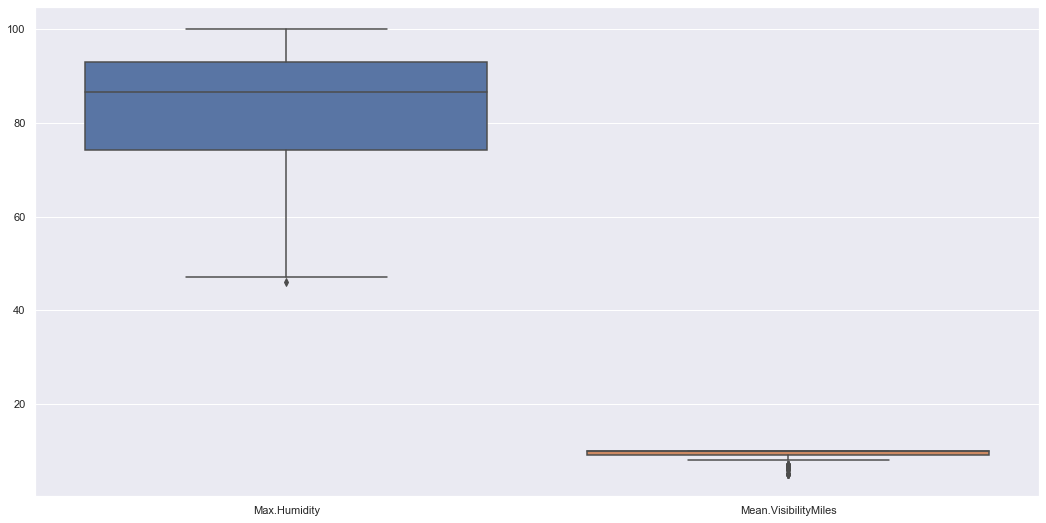

In [8]:
# Separated the columns that had more weird values
newD = evenmoreNew.filter(['Max.Humidity', 'Mean.VisibilityMiles'], axis=1)

mask = (newD < (quartile_1 - 1.5 * IQR)) | (newD > (quartile_3 + 1.5 * IQR))
newD[mask] = np.nan

newD.fillna(value=newD.median(), inplace=True)

# Made a Plot to check after replacing the outliers with the median
sns.set(rc={'figure.figsize':(18,9)})
sns.boxplot(data=newD)

## Replacing the Values of Original Dataframe with Updated Values

In [9]:
## Replacing the values of my original Dataframe with the Updated Dataframe (outliers have been replaced)
df['Max.Humidity'] = newD['Max.Humidity']
df['Mean.VisibilityMiles'] = newD['Mean.VisibilityMiles']

# df.head()

Your dataset should look like `weather_clean.pkl` file at the end. Use it as a refrence.

Let's take a look at our final cleaned dataset before saving it for analysis. We will save it as a 'pickle', a binary file format which will preserve out column types. Text-based file formats like csv and json do not preserve column data types. 

In [10]:
df.head()

,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,...,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees,Date
0,6.0,Rain,46.0,29.0,74.0,30.45,64.0,10.0,22.0,63.0,...,13.0,40.0,26.0,52.0,30.01,39.0,10.0,0.01,268.0,2014-12-01
1,7.0,Rain-Snow,40.0,29.0,92.0,30.71,42.0,10.0,24.0,72.0,...,15.0,27.0,17.0,51.0,30.40,33.0,2.0,0.10,62.0,2014-12-02
2,8.0,Rain,49.0,38.0,100.0,30.40,51.0,10.0,29.0,79.0,...,12.0,42.0,24.0,57.0,29.87,37.0,1.0,0.44,254.0,2014-12-03
3,3.0,None,24.0,33.0,69.0,30.56,43.0,10.0,25.0,54.0,...,12.0,21.0,13.0,39.0,30.09,30.0,10.0,0.00,292.0,2014-12-04
4,5.0,Rain,37.0,26.0,85.0,30.68,42.0,10.0,22.0,66.0,...,10.0,25.0,12.0,47.0,30.45,26.0,5.0,0.11,61.0,2014-12-05


In [11]:
#save the cleaned dataset
df.to_pickle('weather_clean.pkl')